<a href="https://colab.research.google.com/github/i-akash/Time-Series-Analysis/blob/main/Cloud_VM_history_Analyisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Importing

In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## CSV Reading

In [3]:
vmHistory = pd.read_csv('Monitor_VmHistory.csv')

## Data Ploting

In [101]:
def plotTimeseries(data,title,season=24):
  print([x for x in range(data.shape[0]) if x % season==0 and x > 0])
  plt.figure(figsize=(20, 10))
  plt.plot(data)
  plt.vlines(x=[x for x in range(data.shape[0]) if x % season==0 and x > 0], ymin=0, ymax=2500, colors='black', ls='--')
  plt.title(title)
  plt.grid(True)
  plt.show()

## VM History Per Minute

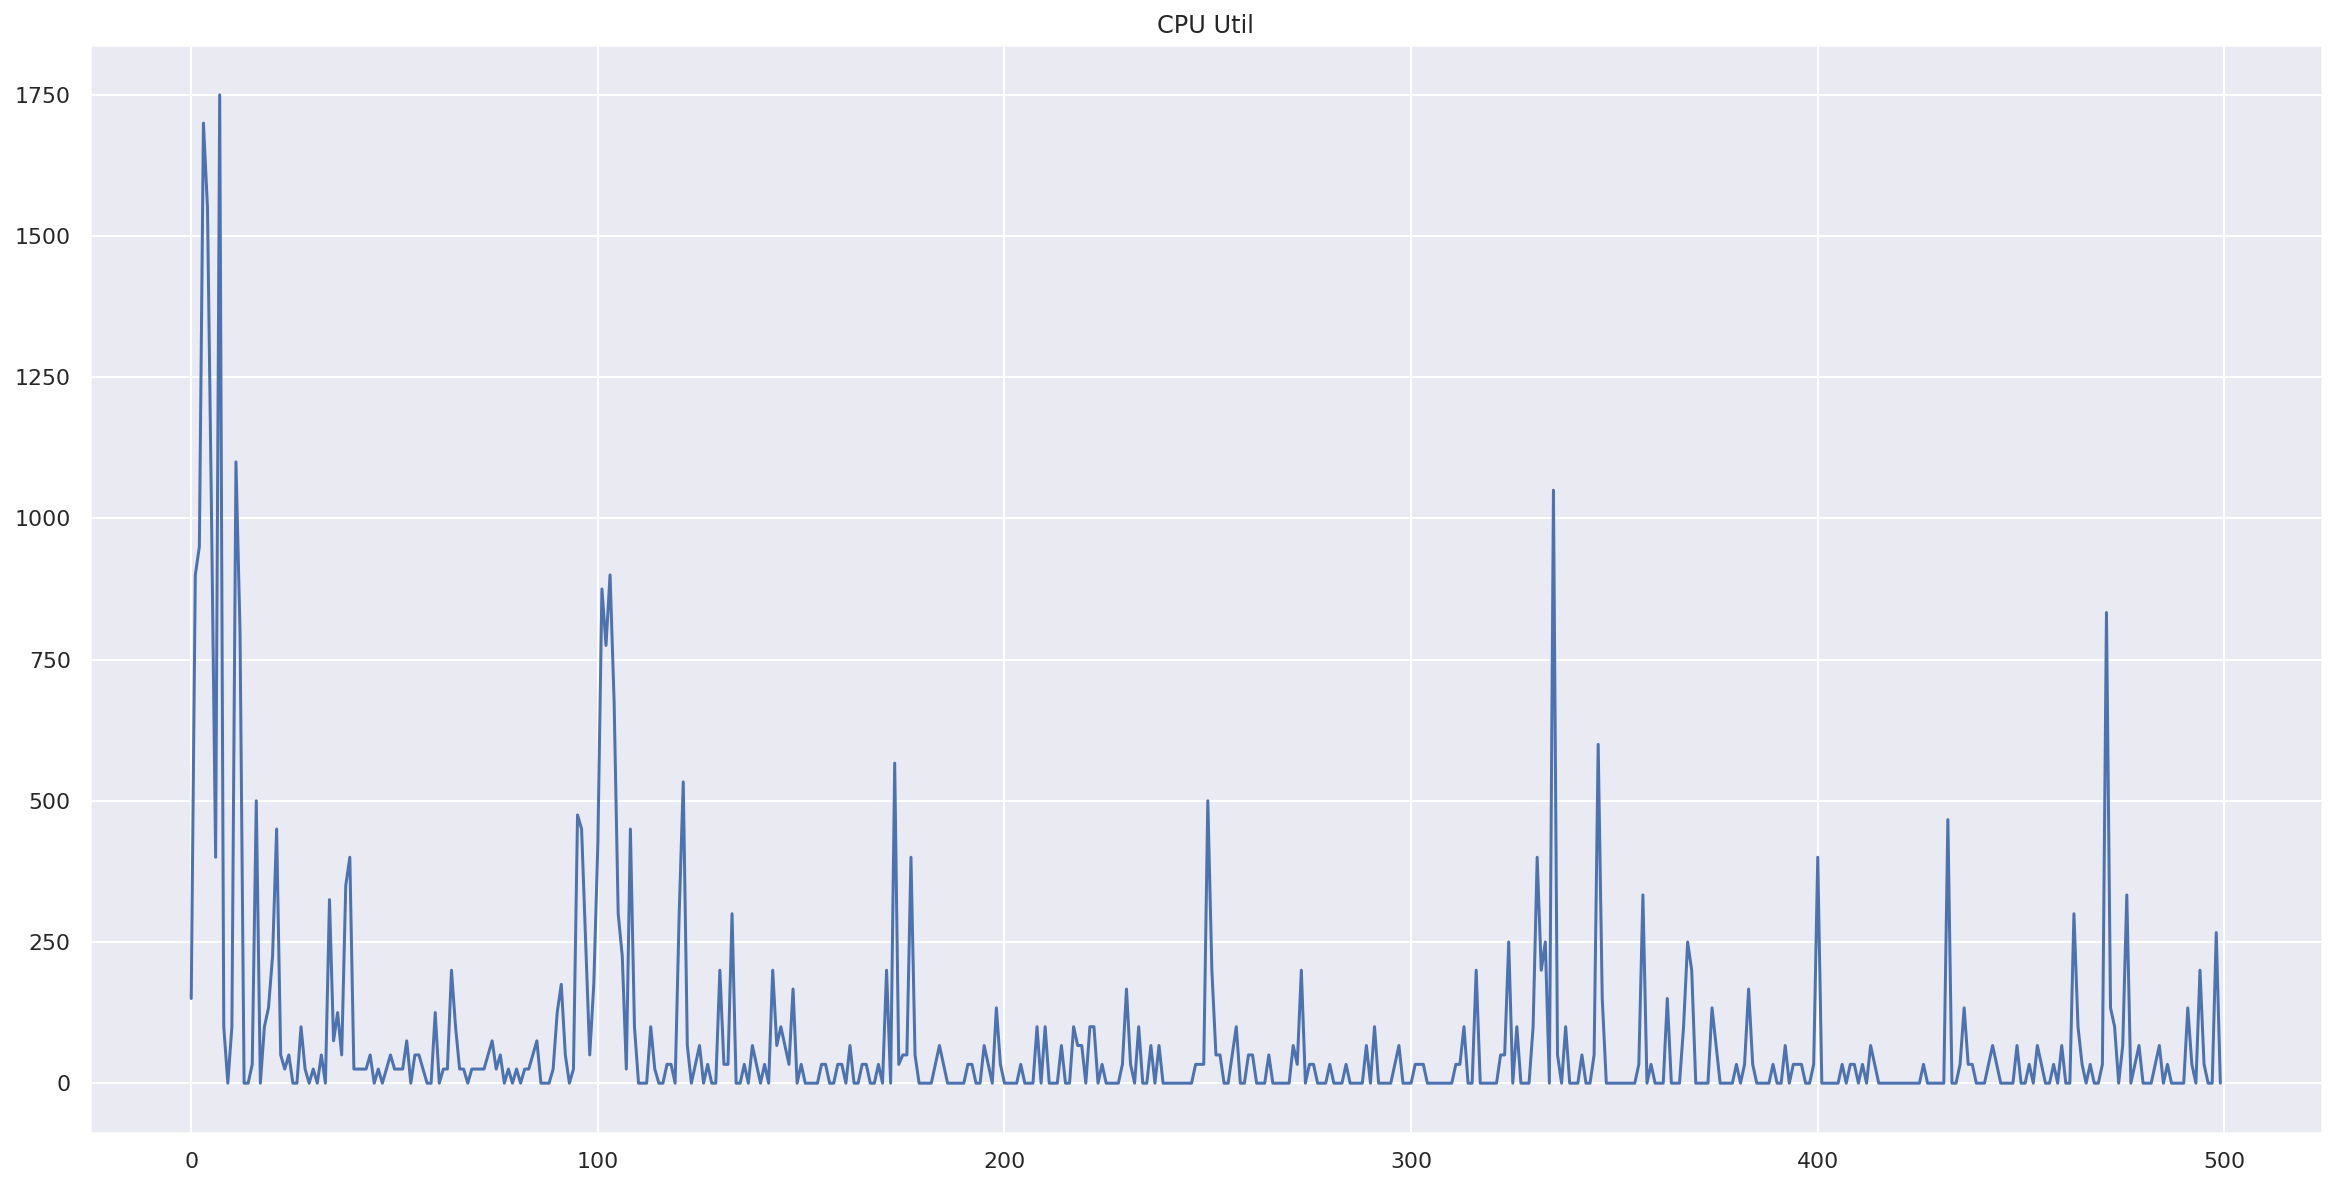

In [61]:
plotTimeseries(vmHistory.head(500)['CPU Load'],"CPU Util",1440)


## VM History Per 10 Minute

In [30]:
vmHistory10min=vmHistory.loc[vmHistory.Minute%10==0]
vmHistory10min.head()

,DayOfWeek,Hour,Minute,CPU Util,CPU Load,VMs No,Initialing VMs,Running VMs,Quarantined VMs,RunningCloudlets,Throughput
9,6,0,10,0.000000,0.000000,2,0,2,0,0,104.347826
19,6,0,20,66.666667,133.333333,3,0,3,0,4,98.750000
29,6,0,30,0.000000,0.000000,4,0,4,0,0,101.818182
39,6,0,40,75.000000,400.000000,4,0,3,1,16,97.468354
49,6,0,50,50.000000,50.000000,4,0,4,0,2,97.916667


In [103]:
vmHistory10min['Index']=[x for x in range(vmHistory10min.shape[0])]
vmHistory10min=vmHistory10min.set_index('Index')
vmHistory10min.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007],
           dtype='int64', name='Index', length=1008)

[144, 288, 432, 576]


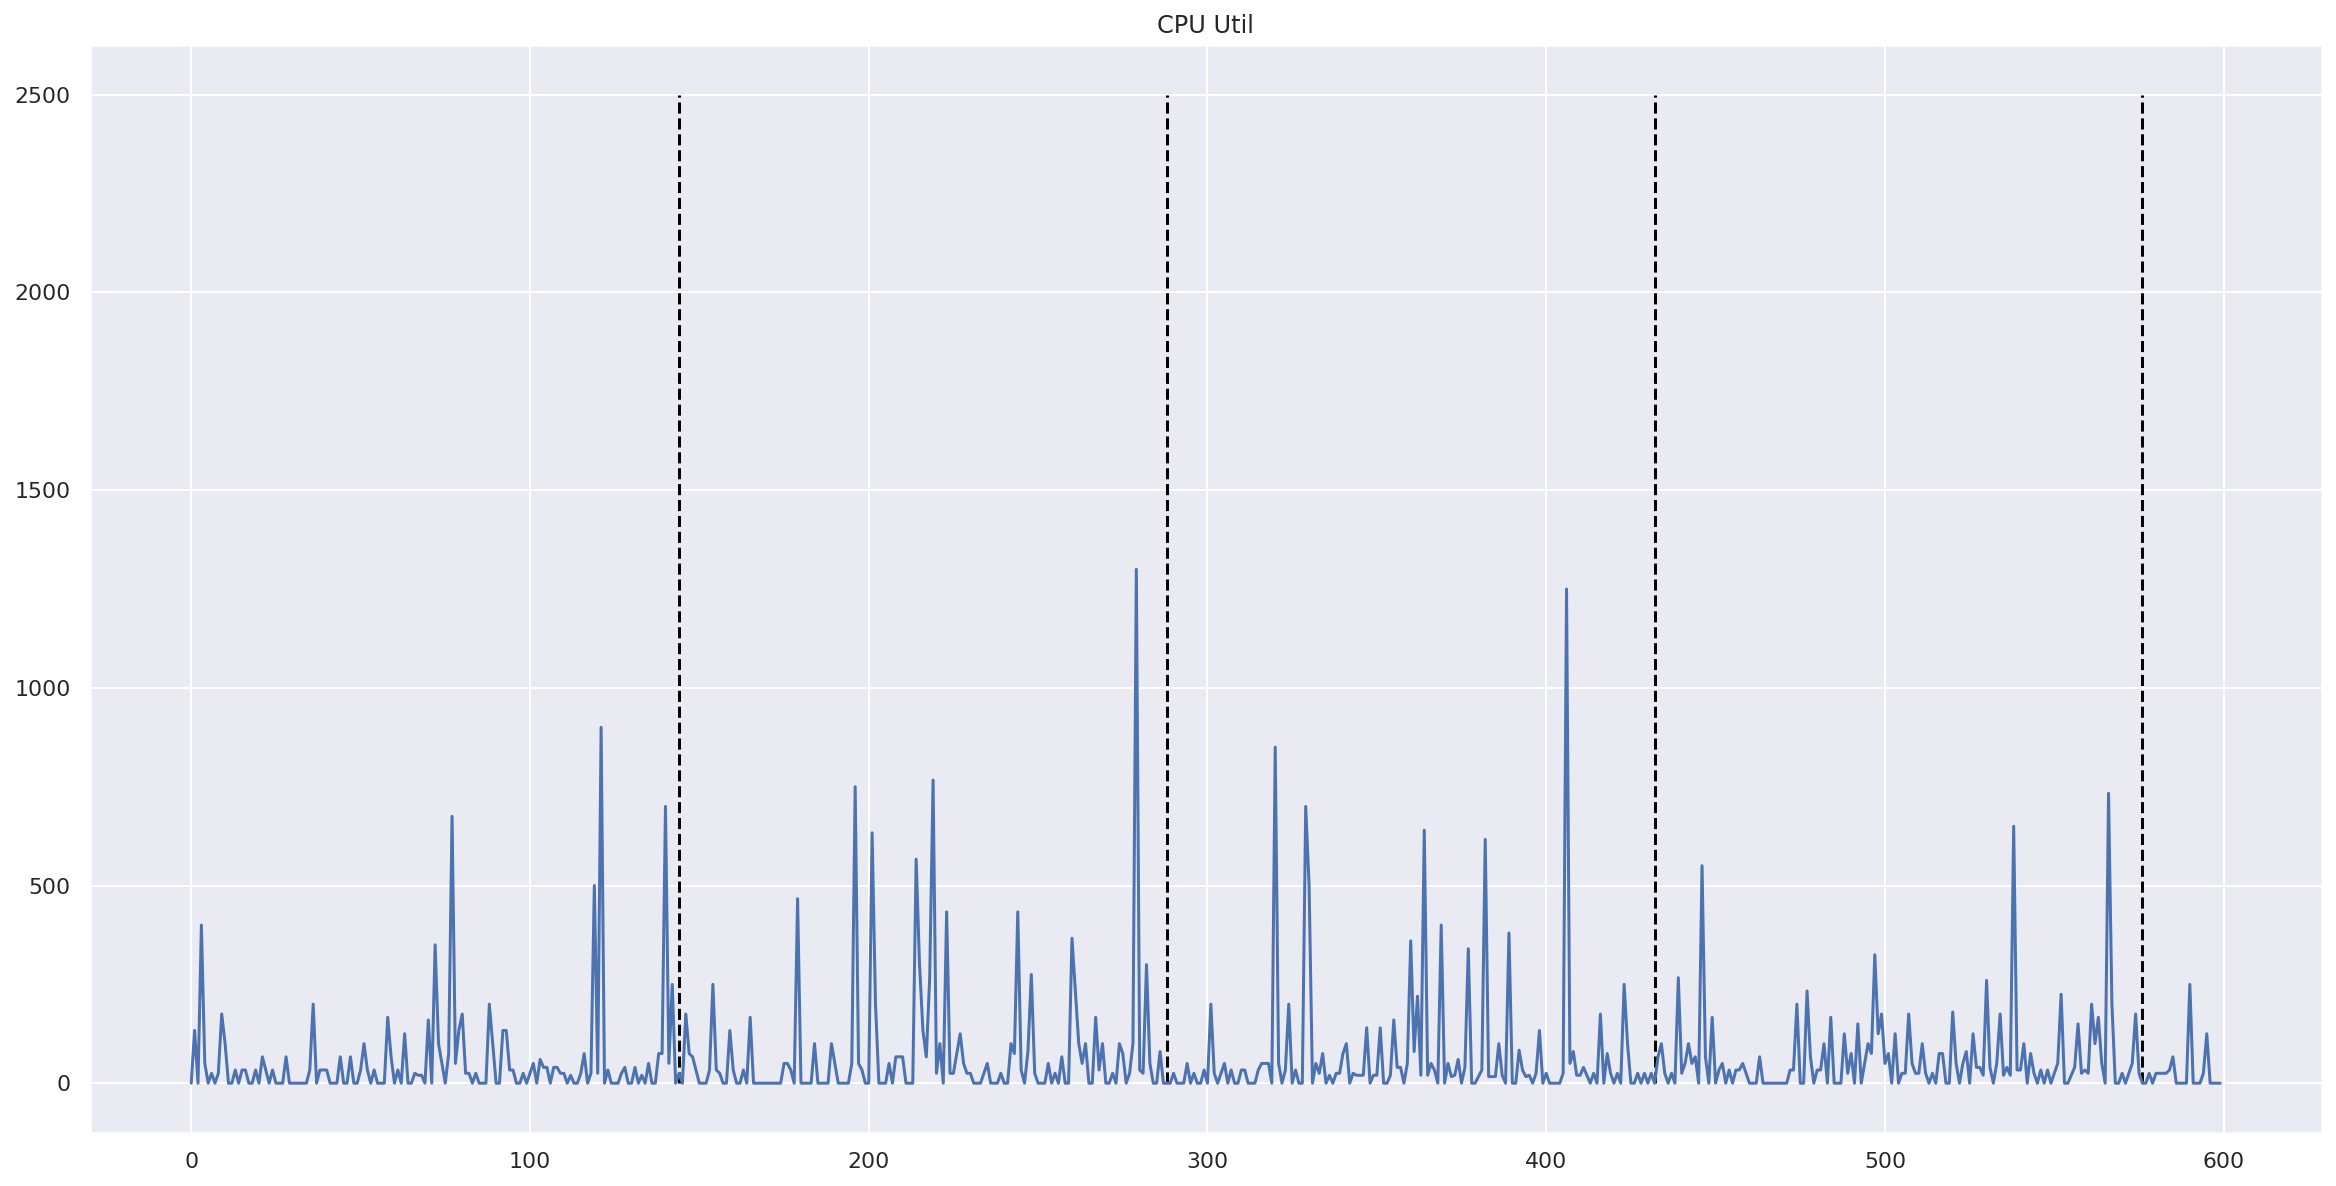

In [107]:
plotTimeseries(vmHistory10min.head(600)['CPU Load'],"CPU Util",144)

## VM History Per Hour

In [95]:
vmHistory1H=vmHistory.loc[vmHistory.Minute%60==0]
vmHistory1H.head()

,DayOfWeek,Hour,Minute,CPU Util,CPU Load,VMs No,Initialing VMs,Running VMs,Quarantined VMs,RunningCloudlets,Throughput
59,6,1,0,0.0,0.0,4,0,4,0,0,100.000000
119,6,2,0,0.0,0.0,3,0,3,0,0,102.173913
179,6,3,0,0.0,0.0,2,0,2,0,0,102.564103
239,6,4,0,0.0,0.0,3,0,2,1,0,104.545455
299,6,5,0,0.0,0.0,3,0,2,1,0,100.000000


In [98]:
vmHistory1H['Index']=[x for x in range(vmHistory1H.shape[0])]
vmHistory1H=vmHistory1H.set_index('Index')
vmHistory1H.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            158, 159, 160, 161, 162, 163, 164, 165, 166, 167],
           dtype='int64', name='Index', length=168)

In [99]:
vmHistory1H.head()

,DayOfWeek,Hour,Minute,CPU Util,CPU Load,VMs No,Initialing VMs,Running VMs,Quarantined VMs,RunningCloudlets,Throughput
Index,,,,,,,,,,,
0,6,1,0,0.0,0.0,4,0,4,0,0,100.000000
1,6,2,0,0.0,0.0,3,0,3,0,0,102.173913
2,6,3,0,0.0,0.0,2,0,2,0,0,102.564103
3,6,4,0,0.0,0.0,3,0,2,1,0,104.545455
4,6,5,0,0.0,0.0,3,0,2,1,0,100.000000


(168, 11)
[24, 48, 72, 96, 120, 144]


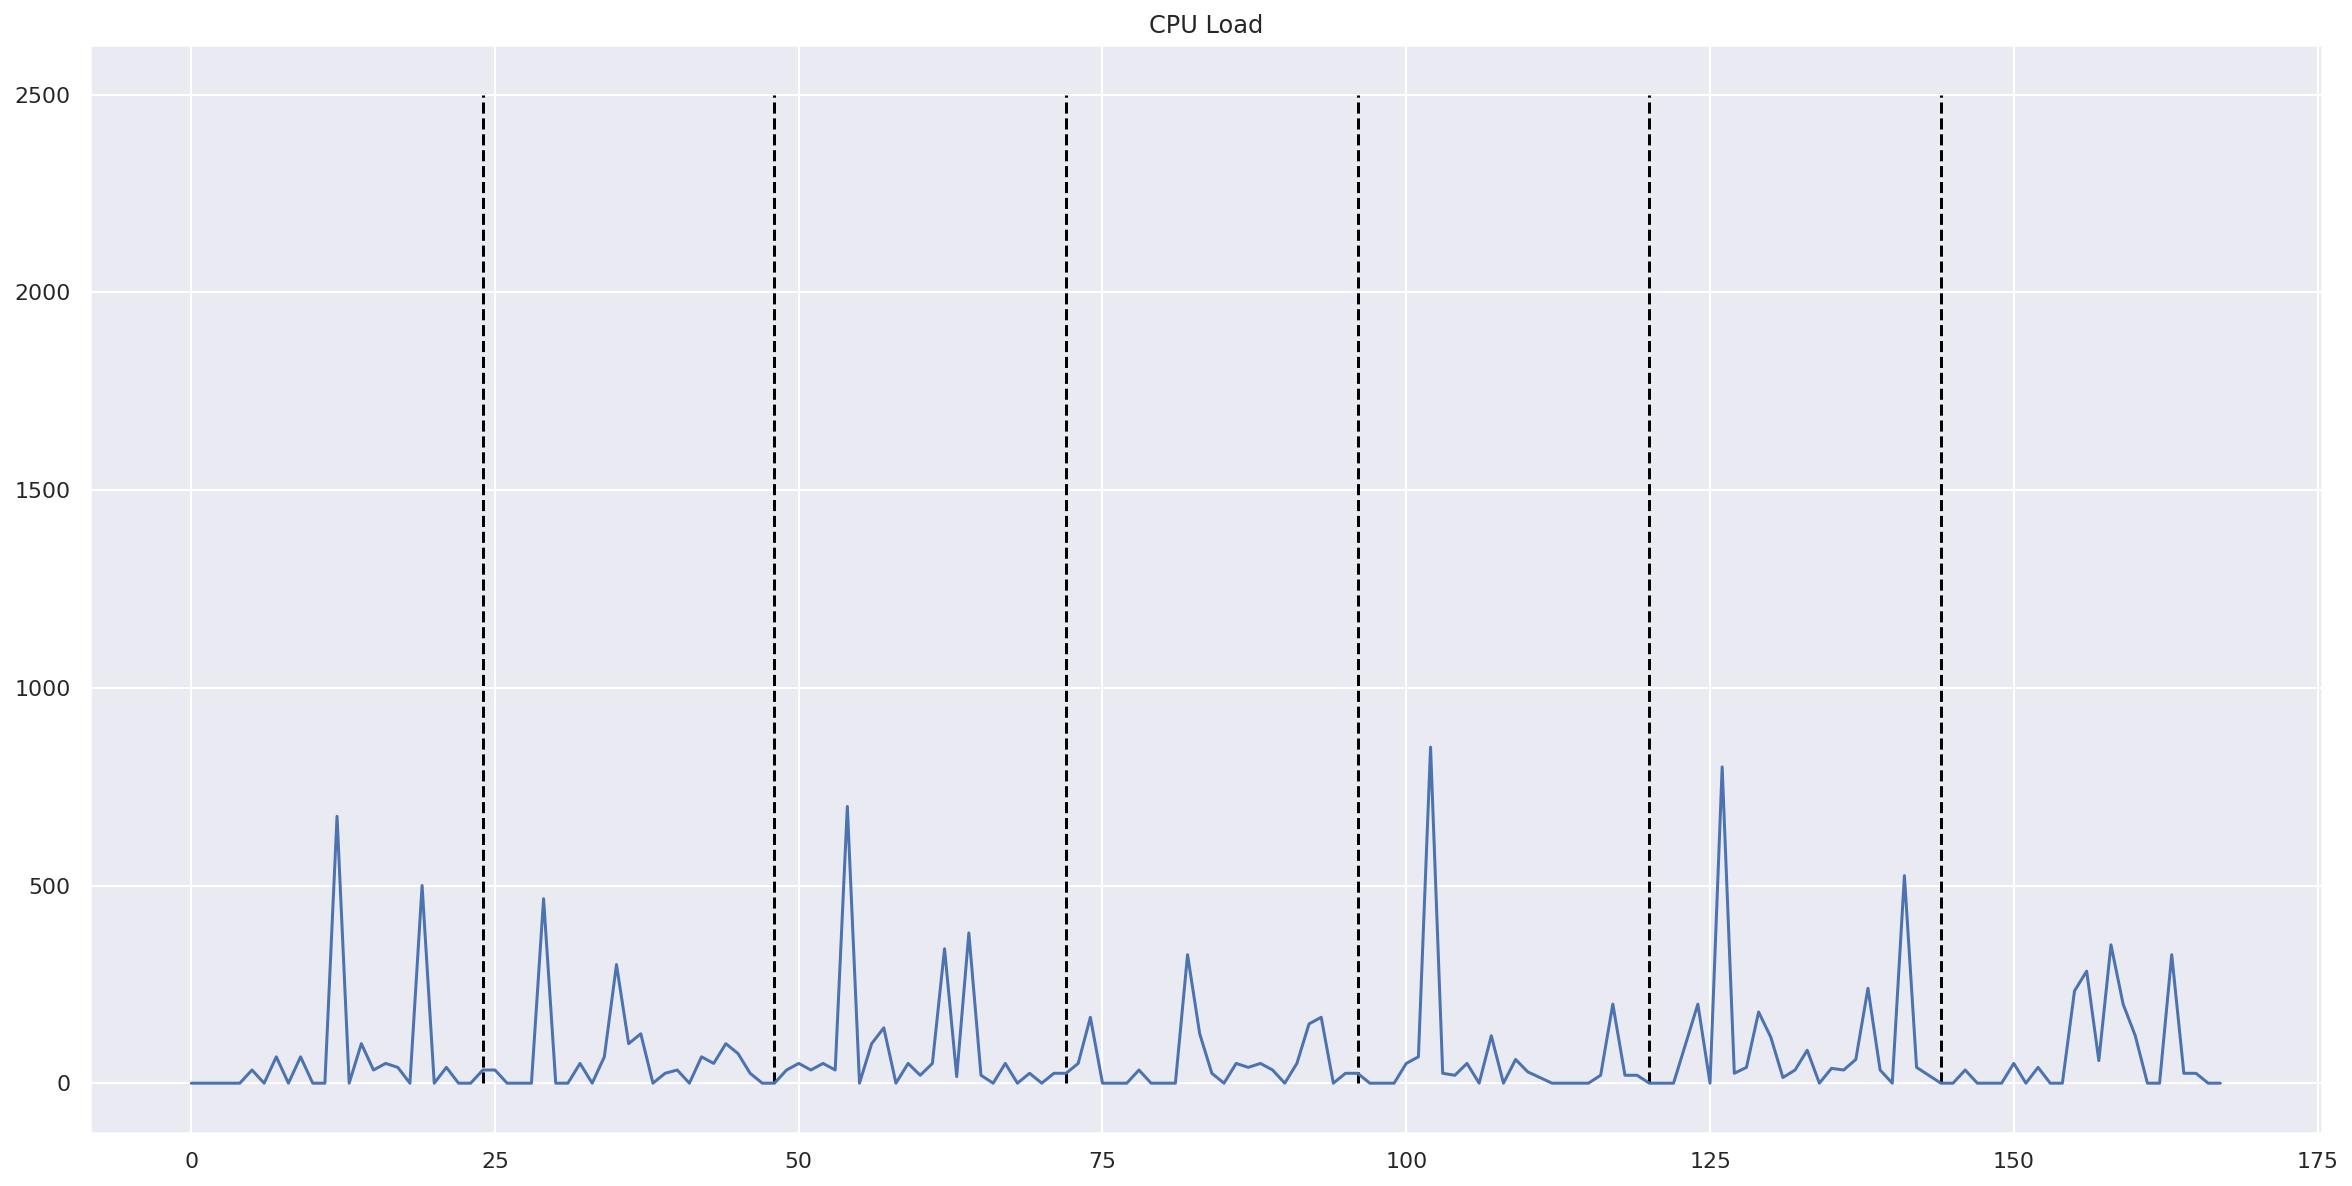

In [114]:
print(vmHistory1H.shape)
plotTimeseries(vmHistory1H['CPU Load'],'CPU Load',24)